# Netflix Movies and TV Shows (Studi Kasus)

**Daftar Acara TV dan Film di Netflix**

Dataset ini terdiri dari acara TV dan film yang tersedia di Netflix hingga tahun 2019. Dataset ini dikumpulkan dari Flixable, yaitu mesin pencari pihak ketiga untuk Netflix.

Pada tahun 2018, mereka merilis sebuah [laporan](https://flixable.com/netflix-museum/) menarik yang menunjukkan bahwa jumlah acara TV di Netflix hampir tiga kali lipat sejak tahun 2010. Jumlah film di layanan streaming ini telah berkurang lebih dari 2.000 judul sejak tahun 2010, sementara jumlah acara TV-nya hampir tiga kali lipat. Akan menarik untuk mengeksplorasi wawasan lain apa saja yang dapat diperoleh dari dataset yang sama.

Mengintegrasikan dataset ini dengan dataset eksternal lainnya seperti peringkat IMDB dan Rotten Tomatoes juga dapat memberikan banyak temuan menarik.


## 1. Import Libraries

In [1]:
# mengimpor semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Understanding Data

In [2]:
# membaca dataset dari file CSV
movies = pd.read_csv('daftar_netflix.csv')
# dataset ini diperoleh dari Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [3]:
movies.head()
# menampilan 5 baris pertama dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
movies.tail()
# menampilan 5 baris terakhir dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
movies.describe(include='all').transpose()
# menampilkan ringkasan statistik dari dataset
# menggunakan include='all' untuk menyertakan data string
# menggunakan transpose() untuk membuat kolom menjadi baris agar lebih mudah dibaca

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s864,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,A Christmas Prince,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787,NaN,NaN,NaN,2013.93,8.75739,1925,2013,2017,2018,2021
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies.info()
# menampilkan informasi tentang dataset seperti jumlah baris, kolom, dan tipe data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
movies.isnull().sum()
# memeriksa apakah ada nilai yang hilang atau kosong (missing values) di setiap kolom
# menggunakan sum() untuk menghitung jumlah nilai yang hilang per kolom

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
movies.nunique()
# menampilkan jumlah nilai unik atau nilai berbeda di setiap kolom
# untuk memriksa apakah ada kolom dengan nilai yang sama atau variasi yang rendah

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. Data Preprocessing

### Menghapus Kolom Langsung

In [5]:
movies.drop(['director', 'cast'], axis=1, inplace=True)
# menghapus kolom 'director' dan 'cast' karena banyak nilai yang hilang (missing values)
# menggunakan axis=1 untuk penghapusan kolom, axis=0 untuk penghapusan baris
# inplace=True untuk menerapkan perubahan langsung pada dataframe movies asli

In [6]:
movies.isnull().sum()
# memeriksa jumlah nilai yang hilang (missing values) di setiap kolom

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

### Mengisi Nilai yang Hilang dengan Nilai Modus

In [7]:
movies['country'].mode()
# menampilkan nilai yang paling sering muncul (modus) di kolom 'country'

0    United States
Name: country, dtype: object

In [8]:
movies['country'] = movies['country'].fillna(movies['country'].mode()[0])
# mengisi nilai yang hilang atau kosong di kolom 'country' dengan modus (nilai yang paling sering muncul)
# menggunakan indexnya nilai modus

In [9]:
movies.isnull().sum()
# nilai yang hilang di kolom 'country' sudah terisi dengan modus
# jumlah nilai yang hilang di kolom 'country' sekarang sudah 0

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

### Mengisi Nilai yang Hilang Secara Manual

In [10]:
null_rating = movies['rating'].isnull()
null_rating
# memeriksa nilai yang hilang atau kosong di kolom 'rating'
# dan menyimpannya dalam variabel null_rating

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: rating, Length: 7787, dtype: bool

In [11]:
null_rating_dataframe = movies[null_rating]
null_rating_dataframe
# menampilkan baris-baris dari dataframe movies yang memiliki nilai yang hilang di kolom 'rating'

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
rating_replacements = {
  67: 'TV-PG',
  2359: 'TV-14',
  3660: 'TV-MA',
  3736: 'TV-MA',
  3737: 'NR',
  3738: 'TV-MA',
  4323: 'TV-MA'
}
# membuat dictionary rating untuk mengisi nilai yang hilang atau kosong
# di kolom 'rating' dalam dataframe movies
# yang berisi index dan nilai yang seharusnya

In [ ]:
rating_replacements.items()
# memeriksa semua nilai dalam dictionary rating_replacement dalam bentuk item atau list
# bentuk item atau list bisa digunakan untuk iterasi
# sedangkan dictionary langsung tidak bisa diiterasi

dict_items([(67, 'TV-PG'), (2359, 'TV-14'), (3660, 'TV-MA'), (3736, 'TV-MA'), (3737, 'NR'), (3738, 'TV-MA'), (4323, 'TV-MA')])

In [19]:
for id, rate in rating_replacements.items():
  movies.loc[id, 'rating'] = rate
# menggunakan iterasi untuk mengganti nilai yang hilang dengan nilai dalam list
# menggunakan movies.loc[id, 'rating'] untuk mengakses nilai data dengan index dan kolom
# mengganti nilai yang hilang atau kosong dengan rate, yaitu nilai yang ada dalam list

In [15]:
movies.isnull().sum()
# memeriksa kembali jumlah nilai yang hilang di setiap kolom
# sekarang kolom 'rating' sudah tidak ada nilai yang hilang

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

### Menamai Nilai yang Hilang

In [16]:
movies['date_added'] = movies[['date_added']].replace(np.nan, 'Not Added')
# mengisi nilai yang hilang atau kosong di kolom 'date_added' dengan string 'Not Added'
# menggunakan dua kurung siku [] pada kolom date_added untuk mengaksesnya sebagai dataframe, bukan series
# menggunakann .replace untuk mengganti niali
# menggunakan np.nan untuk mengakses semua nilai yang hilang

In [ ]:
movies.isnull().sum()
# memeriksa kembali jumlah nilai yang hilang
# sekarang sudah tidak ada lagi niai yang hilang dalam dataset movies

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 4. Data Visualization

In [ ]:
movies['release_year'].value_counts().index[0:15]
# mengecek kolom 'release_year' dalam dataframe movies
# menggunakan .value_counts untuk mengetahui jumlah masing masing nilai pada kolom
# menggunakan .index[0:15] dalam fungsi .value_count() untuk menampilkan data pada index 0-14 saja (15 data)
# otomatis menyortir atau mengurutkan menjadi 15 data dengan jumlah terbanyak karena .value_counts() dan .index[:]

Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011, 2009,
       2008, 2007, 2006],
      dtype='int64', name='release_year')

Text(0, 0.5, 'Year')

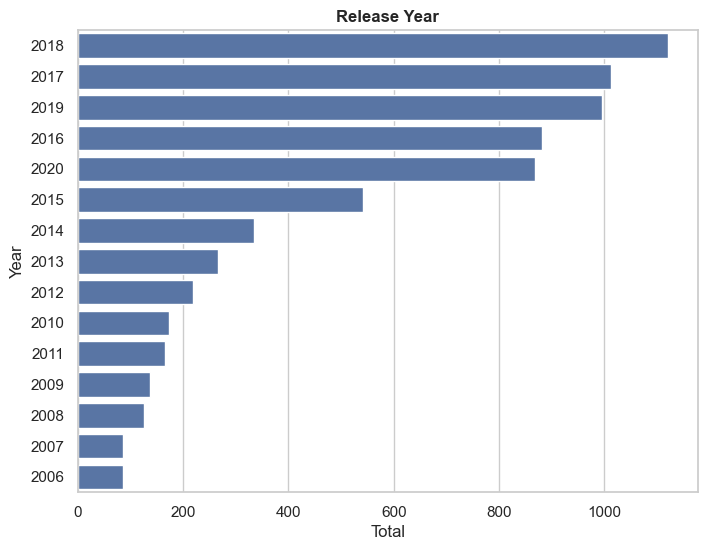

In [ ]:
# membuat countplot, yaitu grafik berbentuk batang yang memperlihatkan perbandingan jumlah pada masing masing nilai
# menggunakan matplotlib dan seaborn
plt.figure(figsize=(8, 6)) # mengatur ukuran grafik countplot
sns.set_theme(style='whitegrid') # menambah garis vertikal dari sumbu x agar lebih mudah dibaca
sns.countplot(y='release_year', data=movies, order=movies['release_year'].value_counts().index[0:15])
plt.title('Release Year', fontsize=12, fontweight='bold') # membuat judul untuk grafik
plt.xlabel('Total') # membuat nama label untuk sumbu x
plt.ylabel('Year') # membuat nama label untuk sumbu y
# menggunakan countplot dari library seaborn dengan memasukkan nama kolom pada satu sumbu dan nama dataset
# untuk mengetahui jumlah masing masing nilai pada kolom tersebut
# menggunakan order= untuk menyortir atau mengurutkan nilai dari yang terbanyak dengan fungsi .value_counts()

Text(0, 0.5, 'Total')

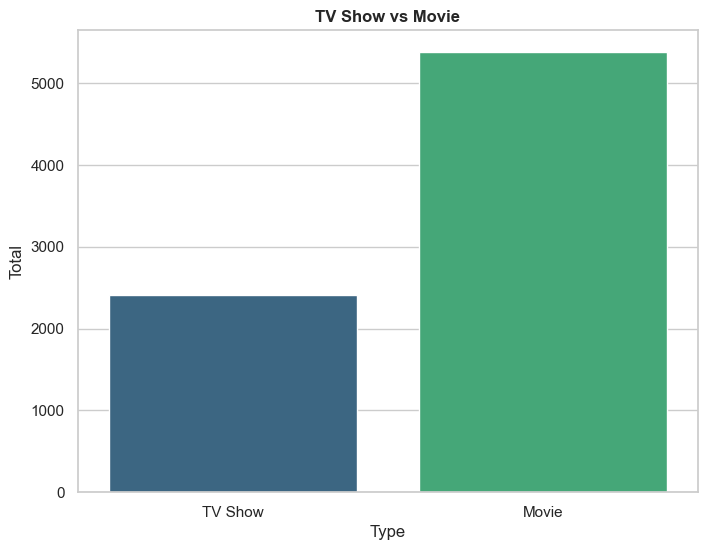

In [ ]:
# membuat countplot untuk perbandingan jumlah movie vs tv show
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=movies, hue='type', palette='viridis', legend=False)
plt.title('TV Show vs Movie', fontsize=12, fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Total')
# menggunakan palette dan hue untuk mengubah dan membedakan warna pada countplot
# mengatur hue atau pembedaan untuk kolom itu sendiri
# memilih palette yang ingin digunakan
# mematikan legend, yaitu kotak untuk memberitahu arti tiap warna yang dikeluarkan oleh fungsi hue 

Text(0, 0.5, 'Total')

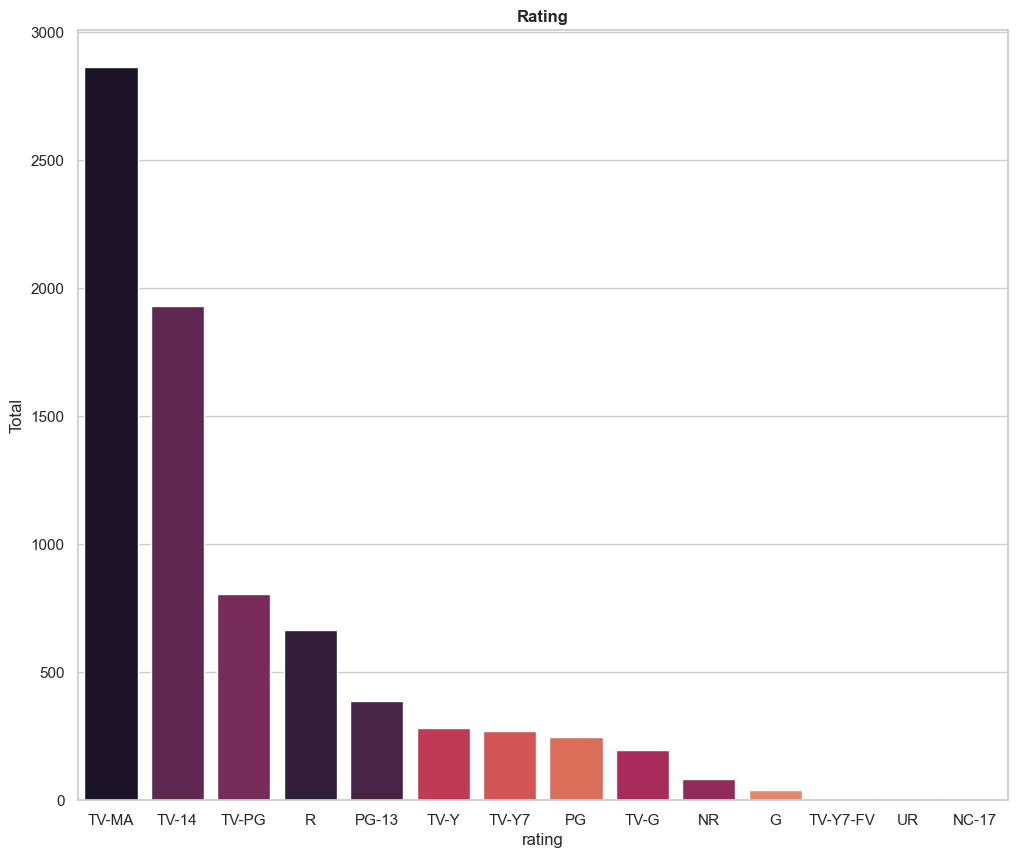

In [ ]:
# membuat countlot untuk kolom rating
plt.figure(figsize=(12, 10))
sns.countplot(x='rating', hue='rating', palette='rocket', legend=False, data=movies, order=movies['rating'].value_counts().index[0:14])
plt.title('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Total')
# menempatkan kolom 'rating' pada sumbu x
# menyortir atau mengurutkan 14 teratas seperti sebelumnya
# menggunakan palette seperti sebelumnya

In [ ]:
# membuat kolom baru berdasarkan kolom yang sudah ada
movies['date_added'] = movies['date_added'].apply(lambda x: str(x))
movies['release_month'] = movies['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
movies['release_month']
# membuat kolom untuk mengetahui data bulan rilis menggunakan kolom 'date_added'
# menerapkan (apply) operasi fungsi lambda pada setiap nilai dengan inisial x untuk setiap nilai
# mengubah setiap nilai menjadi tipe data string
# untuk setiap nilai(x), dilakukan .lstrip() dengan .split() berdasarkan spasi (" ") dan diambil indeks ke 0 nya

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: release_month, Length: 7787, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'December'),
  Text(1, 0, 'October'),
  Text(2, 0, 'January'),
  Text(3, 0, 'November'),
  Text(4, 0, 'March'),
  Text(5, 0, 'September'),
  Text(6, 0, 'August'),
  Text(7, 0, 'April'),
  Text(8, 0, 'July'),
  Text(9, 0, 'May'),
  Text(10, 0, 'June'),
  Text(11, 0, 'February')])

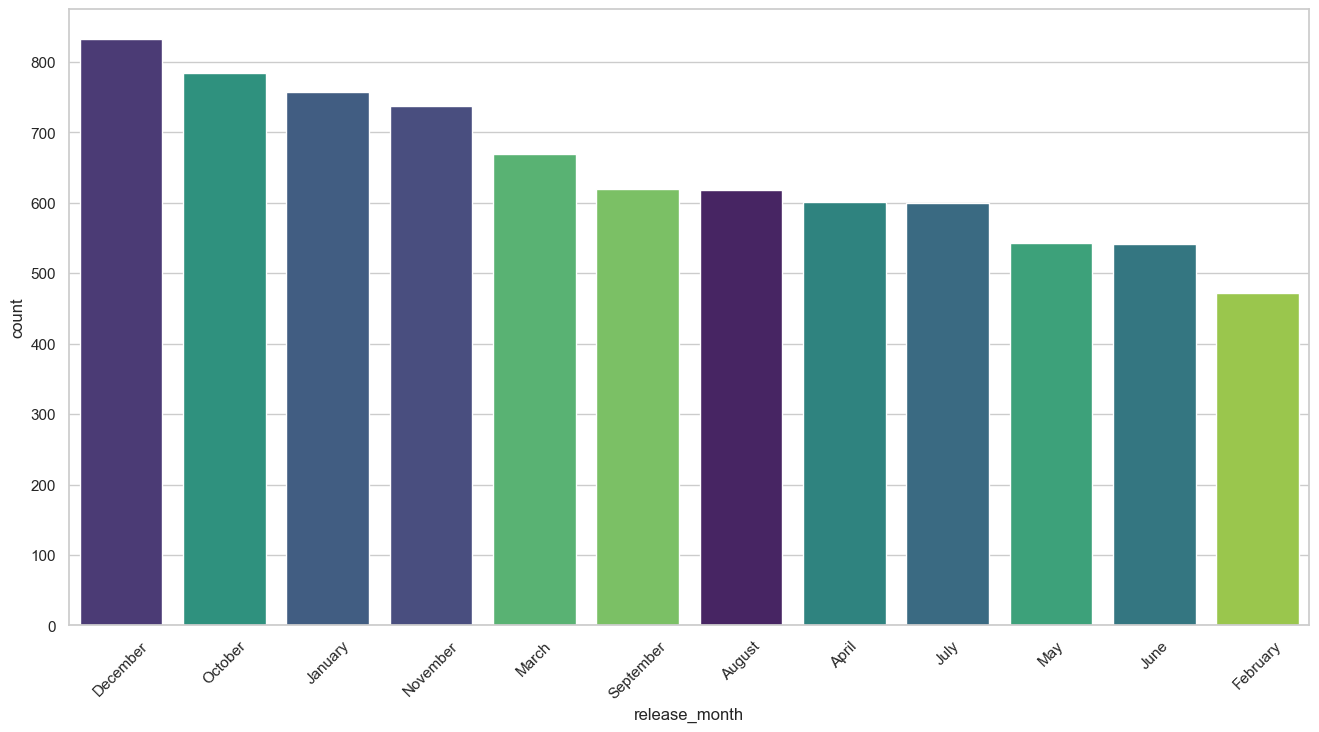

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='release_month', data=movies, hue='release_month', palette='viridis', legend=False, order=movies['release_month'].value_counts().index[0:12])
plt.xticks(rotation=45) # memiringkan setiap nilai pada kolom, yaitu nama-nama bulan
# membuat countplot untuk mengetahui jumlah masing masing bulan dalam kolom 'release_month'
# menyortir atau mengurutkan menggunakan .value_counts seperti sebelumnya
# menggunakan palette seperti sebelumnya
# pada bulan apa rilis movie dan tv show paling banyak